# OpenCV

## 读取操作

### 基本读取

cv2读取的图片通道使按B、G、R排列的，而非RGB顺序。因此工程中opencv库与其他库混用时要注意，可以用img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)转化为RGB通道

In [1]:
import cv2 
img = cv2.imread('test.jpg') #可读取tif格式图像 

cv2.imshow('the window name', img)
cv2.waitKey()  #在imshow之后如果没有waitKey语句则不会正常显示图像。

-1

In [2]:
cv2.imwrite('new_image.jpeg', img)

True

img numpy数组矩阵；img.shape 获取图像的（高，宽，通道数）；img.size图像的像素点数；img.dtype图像的数据类型(uint8)。

### 灰度图读取

In [3]:
# gray = cv2.imread('image.jpg',cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_UNCHANGED 包含alpha通道（透明度）
#使用颜色转换函数cv2.cvtColor
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[134, 134, 134, ..., 134, 134, 134],
       [134, 134, 134, ..., 134, 134, 134],
       [134, 134, 134, ..., 134, 134, 134],
       ...,
       [134, 134, 134, ..., 109, 109, 109],
       [134, 134, 134, ..., 109, 109, 109],
       [134, 134, 134, ..., 109, 109, 109]], dtype=uint8)

### 通道操作

In [4]:
#通道分离
b, g, r = cv2.split(img) 
b

array([[200, 200, 200, ..., 200, 200, 200],
       [200, 200, 200, ..., 200, 200, 200],
       [200, 200, 200, ..., 200, 200, 200],
       ...,
       [200, 200, 200, ..., 162, 162, 162],
       [200, 200, 200, ..., 162, 162, 162],
       [200, 200, 200, ..., 162, 162, 162]], dtype=uint8)

In [5]:
g

array([[152, 152, 152, ..., 152, 152, 152],
       [152, 152, 152, ..., 152, 152, 152],
       [152, 152, 152, ..., 152, 152, 152],
       ...,
       [152, 152, 152, ..., 124, 124, 124],
       [152, 152, 152, ..., 124, 124, 124],
       [152, 152, 152, ..., 124, 124, 124]], dtype=uint8)

In [6]:
# 合并
merge_img = cv2.merge((b, g, r))
merge_img

array([[[200, 152,  74],
        [200, 152,  74],
        [200, 152,  74],
        ...,
        [200, 152,  74],
        [200, 152,  74],
        [200, 152,  74]],

       [[200, 152,  74],
        [200, 152,  74],
        [200, 152,  74],
        ...,
        [200, 152,  74],
        [200, 152,  74],
        [200, 152,  74]],

       [[200, 152,  74],
        [200, 152,  74],
        [200, 152,  74],
        ...,
        [200, 152,  74],
        [200, 152,  74],
        [200, 152,  74]],

       ...,

       [[200, 152,  74],
        [200, 152,  74],
        [200, 152,  74],
        ...,
        [162, 124,  60],
        [162, 124,  60],
        [162, 124,  60]],

       [[200, 152,  74],
        [200, 152,  74],
        [200, 152,  74],
        ...,
        [162, 124,  60],
        [162, 124,  60],
        [162, 124,  60]],

       [[200, 152,  74],
        [200, 152,  74],
        [200, 152,  74],
        ...,
        [162, 124,  60],
        [162, 124,  60],
        [162, 124,  60]]

### RIO操作

In [7]:
#数组的切片操作
roi = img[100:300, 30:350, :]
roi

array([[[200, 152,  74],
        [200, 152,  74],
        [200, 152,  74],
        ...,
        [188, 162, 116],
        [229, 208, 170],
        [255, 255, 233]],

       [[200, 152,  74],
        [200, 152,  74],
        [200, 152,  74],
        ...,
        [173, 141,  82],
        [179, 156, 108],
        [225, 213, 179]],

       [[200, 152,  74],
        [200, 152,  74],
        [200, 152,  74],
        ...,
        [191, 152,  83],
        [165, 136,  79],
        [198, 182, 140]],

       ...,

       [[200, 152,  74],
        [200, 152,  74],
        [200, 152,  74],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[200, 152,  74],
        [200, 152,  74],
        [200, 152,  74],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[200, 152,  74],
        [200, 152,  74],
        [200, 152,  74],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

## 图像操作

### 缩放与旋转

In [8]:
h, w = 100, 200
cols, rows = 100, 200

#缩放
img_resize = cv2.resize(img, (h, w)) #w,宽;h,高

cv2.imshow('the window name', img_resize)
cv2.waitKey()  #在imshow之后如果没有waitKey语句则不会正常显示图像。

-1

In [9]:
#旋转 opencv中目前没有现成函数直接用来图像旋转，是用仿射变换函数warpAffine来实现的。
#cv2.getRotationMatrix2D() 参数1：旋转中心点；参数2：旋转角度；参数3：缩放大小。输出：旋转矩阵
Matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
img_rotate = cv2.warpAffine(img, Matrix,(cols, rows))

cv2.imshow('the window name', img_rotate)
cv2.waitKey()  #在imshow之后如果没有waitKey语句则不会正常显示图像。

-1

In [10]:
#翻转cv2.flip(img,filpcode)
img_filp = cv2.flip(img, 0) #0:-垂直翻转

cv2.imshow('the window name', img_filp)
cv2.waitKey()  #在imshow之后如果没有waitKey语句则不会正常显示图像。

-1

In [11]:
img_filp = cv2.flip(img, 1) #1:-水平翻转

cv2.imshow('the window name', img_filp)
cv2.waitKey()  #在imshow之后如果没有waitKey语句则不会正常显示图像。

-1

In [12]:
img_filp = cv2.flip(img, -1) #负值:-垂直+水平翻转

cv2.imshow('the window name', img_filp)
cv2.waitKey()  #在imshow之后如果没有waitKey语句则不会正常显示图像。

-1

### 图像滤波

对图像进行滤波，可以有两种效果：一种是平滑滤波，用来抑制噪声；另一种是微分算子，可用来检测边缘和特征提取。

In [13]:
#中值滤波
img_medianBlur = cv2.medianBlur(img,5)

cv2.imshow('the window name', img_medianBlur)
cv2.waitKey()  #在imshow之后如果没有waitKey语句则不会正常显示图像。

-1

In [14]:
#均值滤波
img_Blur = cv2.blur(img,(5,5))

cv2.imshow('the window name', img_Blur)
cv2.waitKey()  #在imshow之后如果没有waitKey语句则不会正常显示图像。

-1

In [15]:
#高斯滤波
img_GaussianBlur = cv2.GaussianBlur(img,(7,7),0) 

cv2.imshow('the window name', img_GaussianBlur)
cv2.waitKey()  #在imshow之后如果没有waitKey语句则不会正常显示图像。

-1

# PIL

## 读取操作

### 基本读取操作

PIL读取图片获得的不是矩阵，而是Image格式，可以利用numpy进行转化。

In [16]:
from PIL import Image
import numpy as np
#读取图像
img = Image.open('test.jpg') #可以读取tif格式图片
img.show()              #显示图像，会调用系统默认的图片查看器
img_arr = np.array(img) #3维矩阵
#存储图像
new_img = Image.fromarray(img_arr)
new_img.save('newImage.jpeg') #如果不转矩阵可直接用'.save'保存

### 灰度图读取

In [17]:
gary = Image.open('test.jpg').convert('L')
gray

array([[134, 134, 134, ..., 134, 134, 134],
       [134, 134, 134, ..., 134, 134, 134],
       [134, 134, 134, ..., 134, 134, 134],
       ...,
       [134, 134, 134, ..., 109, 109, 109],
       [134, 134, 134, ..., 109, 109, 109],
       [134, 134, 134, ..., 109, 109, 109]], dtype=uint8)

### 通道操作

In [18]:
#通道的分离合并
r,g,b = img.split()
img = Image.merge('RGB', (r, g, b))

In [19]:
#复制图像
img_copy = img.copy()
img_copy.show()              #显示图像，会调用系统默认的图片查看器

### ROI获取

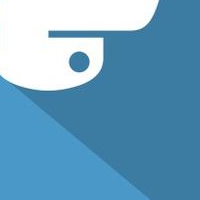

In [20]:
roi = img.crop((200, 300, 400, 500))# （左、上、右、下）即左上角和右下角像素点的坐标'x'与'y'
roi

## 图像操作

### 缩放与旋转

In [21]:
#缩放
img_resize = img.resize((h,w))

img_resize.show()

In [22]:
#旋转
img_r90 = img.rotate(90) #旋转90度, 向左

img_r90.show()

In [23]:
img_transpose_tb = img.transpose(Image.FLIP_TOP_BOTTOM)#上下翻转

img_transpose_tb.show()

In [24]:
img_transpose_lr = img.transpose(Image.FLIP_LEFT_RIGHT)#左右翻转

img_transpose_lr.show()

### 图像增强

In [25]:
from PIL import Image
from PIL import ImageEnhance

#原始图像
img = Image.open('test.jpg')

In [26]:
#亮度增强
img_bright = ImageEnhance.Brightness(img)
brightness = 3
image_brighted = img_bright.enhance(brightness)
image_brighted.show()

In [27]:
#色度增强
img_color = ImageEnhance.Color(img)
color = 2
image_colored = img_color.enhance(color)
image_colored.show()

In [28]:
#对比度增强
img_contrast = ImageEnhance.Contrast(img)
contrast = 3
image_contrasted = img_contrast.enhance(contrast)
image_contrasted.show()

In [29]:
#锐度增强
img_sharp = ImageEnhance.Sharpness(img)
sharpness = 2
image_sharped = img_sharp.enhance(sharpness)
image_sharped.show()

### 图像滤波

In [30]:
from PIL import ImageFilter

In [31]:
#模糊滤波
img_blur = img.filter(ImageFilter.BLUR)
img_blur.show()

In [32]:
#轮廓滤波
img_contour = img.filter(ImageFilter.CONTOUR)
img_contour.show()

In [33]:
#细节滤波
img_detail = img.filter(ImageFilter.DETAIL)
img_detail.show()

In [34]:
#边界增强滤波
img_edge_enhance = img.filter(ImageFilter.EDGE_ENHANCE)
img_edge_enhance.show()

In [35]:
#锐化滤波
img_sharp = img.filter(ImageFilter.SHARPEN)
img_sharp.show()

In [36]:
#高斯模糊滤波
img_gauss = img.filter(ImageFilter.GaussianBlur(radius=2))  # radius指定平滑半径，也就是模糊的程度。
img_gauss.show()

# matplotlib

Matplotlib是一个Python 2D绘图库，它可以在不同的平台上以各种硬拷贝格式和交互环境生成发布质量数据。Matplotlib可以用于Python脚本、Python和IPython shell、Jupyter notebook、web应用服务器和四个图形用户界面工具包。对于简单的绘图，pyplot模块提供了一个类似于matlab的接口，特别是与IPython结合使用时。对于power用户，您可以通过面向对象的界面或通过MATLAB用户熟悉的一组函数来完全控制线样式、字体属性、轴属性等.

## 图像读取

### 基本的读取

In [37]:
import matplotlib.pyplot as plt
import numpy as np 

img  = plt.imread('test.jpg') #可以读取tif文件
plt.imshow(img) 
# plt.axis('off')  #关闭坐标轴上的数字
plt.show()
plt.savefig('new_img_plt.jpg')

<Figure size 640x480 with 1 Axes>

### 灰度图

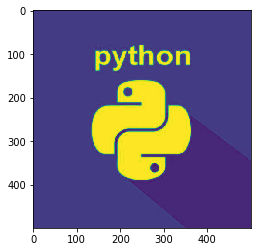

In [38]:
# 取单通道-r通道
img_r = img[:, :, 0] 
plt.imshow(img_r)
plt.show()

输出并不是灰度图，得到灰度图需要添加cmap = 'Greys_r' 参数

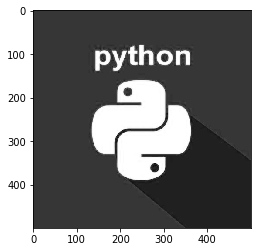

In [39]:
plt.imshow(img_r,cmap='Greys_r')
plt.show()

# skimage

scikit-image是一组用于图像处理和计算机视觉的算法。“skimage”的主要包只提供了一些用于转换图像数据类型的实用程序;大多数功能程序存在其子包中。读取功能包含在io模块中。

## 读取

### 基本的读取

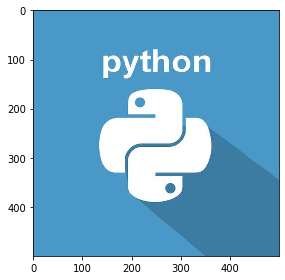

In [40]:
from skimage import io

img = io.imread('test.jpg')  
io.imshow(img)
io.show() 
io.imsave('new_img_skimage.jpg', img)

### 灰度图读取

C:\Users\temp\Anaconda3\lib\site-packages\skimage\io\_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


float64


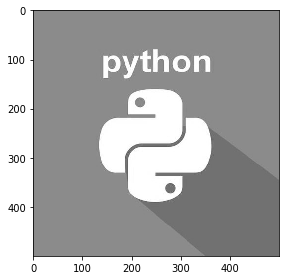

In [41]:
img_grey = io.imread('test.jpg', as_grey=True)
print(img_grey.dtype)  #float64    原因加入as_grey参数后，imread将灰度图的矩阵值归一化。

io.imshow(img_grey)
io.show() 

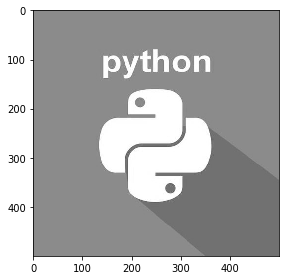

In [42]:
from skimage import color

#可以用skimage中的color模块得到灰度图
img_grey = color.rgb2grey(img)  #彩色转灰度
io.imshow(img_grey)
io.show() 

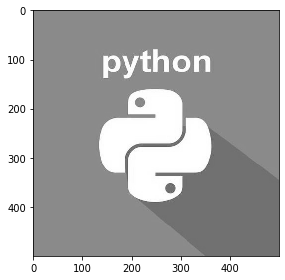

In [43]:
#灰度转彩色
img_rgb = color.grey2rgb(img_grey)

io.imshow(img_rgb)
io.show() 

## 图像处理

### 图像缩放与旋转

#### 缩放

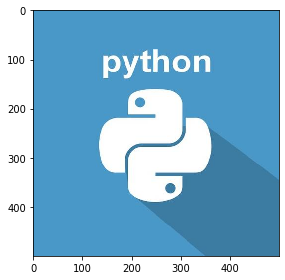

In [44]:
from skimage import transform, io  
# resize
h, w = 500, 500
img_resize = transform.resize(img, (h, w)) #(h, w)新图像尺寸

io.imshow(img_resize)
io.show()

C:\Users\temp\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


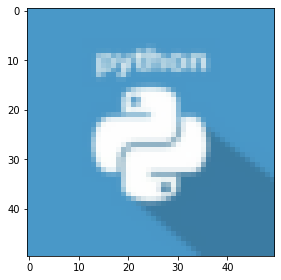

In [45]:
#rescale #按比例缩放 
img_r1 = transform.rescale(img, 0.1) #将图像高宽缩小为原图片大小的0.1倍

io.imshow(img_r1)
io.show()

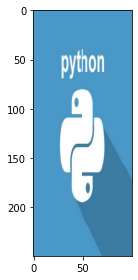

In [46]:
img_r2 = transform.rescale(img,[0.5, 0.2])#高缩小到0.5倍，宽缩小到0.2倍

io.imshow(img_r2)
io.show()

#### 旋转

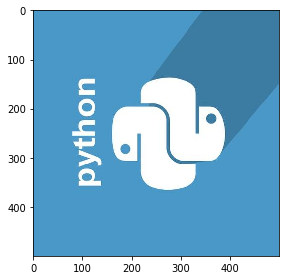

In [47]:
#旋转rotate
img_90 = transform.rotate(img, 90) #旋转90度不改变大小

io.imshow(img_90)
io.show()

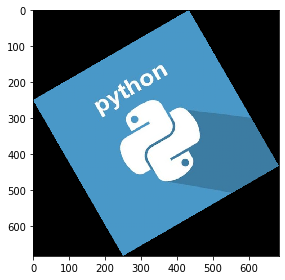

In [48]:
img_30 = transform.rotate(img, 30, resize=True)#旋转30度，同时改变大小

io.imshow(img_30)
io.show()

### 图像滤波

skimage库中通过filters模块进行滤波操作。

#### sobel算子
sobel算子可以用来检测边缘

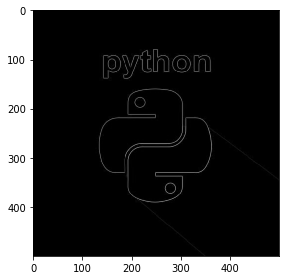

In [49]:
from skimage import filters

edges = filters.sobel(img_grey) # 灰度图

io.imshow(edges)
io.show()

#### roberts算子
用于检测边缘

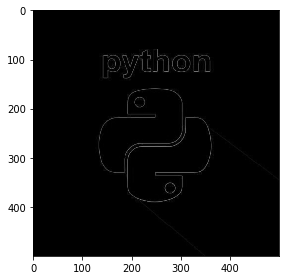

In [50]:
edges = filters.roberts(img_grey)

io.imshow(edges)
io.show()

#### canny算子
用于提取边缘特征，在feature模块内,通过修改sigma的值来调整效果，sigma越小线条越细

In [51]:
from skimage import feature
edges1 = feature.canny(img_grey) #sigma=1
edges2 = feature.canny(img_grey, sigma=3)#sigma=3

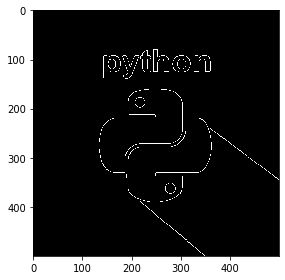

In [52]:
io.imshow(edges1)
io.show()

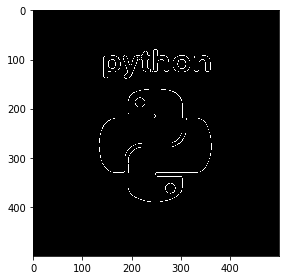

In [53]:
io.imshow(edges2)
io.show()

#### gabor滤波
用于边缘检测和纹理特征提取,通过调整frequency值来调整滤波效果，返回一对边缘结果，一个是用真实滤波核的滤波结果，另一个是想象滤波核的滤波结果。

In [54]:
from skimage import filters
filt_real, filt_fake = filters.gabor(img_grey, frequency=0.4)

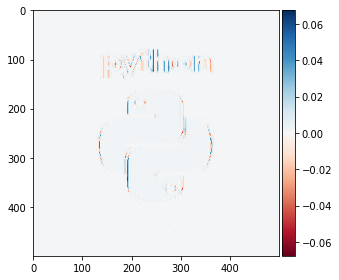

In [55]:
io.imshow(filt_real)
io.show()

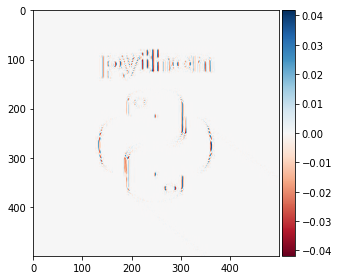

In [56]:
io.imshow(filt_fake)
io.show()

#### gaussian滤波
多维滤波器，平滑滤波，可以消除高斯噪声,通过调节sigma的值来调整滤波效果，sigma越大，图像越模糊

C:\Users\temp\Anaconda3\lib\site-packages\skimage\filters\_gaussian.py:122: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


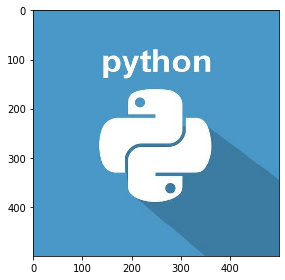

In [57]:
edges = filters.gaussian(img, sigma=0.4)

io.imshow(edges)
io.show()

#### median滤波
中值滤波，平湖滤波，消除噪声。需要用skimage.morphology模块来设置滤波器的形状，滤波器越大，图像越模糊。

C:\Users\temp\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


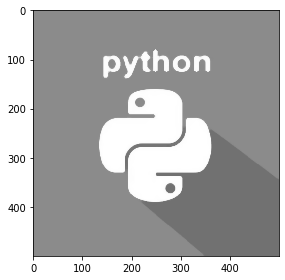

In [58]:
from skimage.morphology import disk
edges = filters.median(img_grey, disk(5))

io.imshow(edges)
io.show()

# 业务功能函数若干

## 使用的库

In [59]:
import os
import numpy
import cv2
import freetype
import imagehash
from PIL import Image
from PIL import ImageFile

## 获取一个图像文件的HASH值

In [60]:
def get_image_hash(image_file):
    """
    获取一个图像文件的HASH值
    :param image_file:
    :return: 哈希值
    """
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    fp = open(image_file, 'rb')
    # 图像的哈希值
    s_hash = imagehash.phash(Image.open(fp), hash_size=16)

    return s_hash

In [61]:
get_image_hash("test.jpg")

array([[ True,  True, False, False,  True, False,  True, False, False,
         True, False, False,  True,  True,  True,  True],
       [ True, False,  True,  True, False, False,  True,  True, False,
        False, False,  True,  True, False, False,  True],
       [False,  True,  True,  True, False,  True, False, False,  True,
         True,  True, False, False,  True, False, False],
       [ True,  True, False, False,  True,  True,  True, False, False,
         True, False, False,  True,  True,  True, False],
       [ True, False, False,  True, False, False,  True,  True, False,
        False, False,  True,  True, False, False,  True],
       [False,  True,  True, False,  True,  True, False, False,  True,
        False,  True,  True, False, False,  True,  True],
       [False,  True, False,  True,  True, False, False,  True,  True,
        False,  True, False, False,  True,  True, False],
       [False, False,  True, False, False, False,  True,  True, False,
         True, False, Fals

##  颜色反转

In [62]:
def color_reversal(image_file):
    """
    # 颜色反转
    :param image: 图像文件
    :return: 图像对象 - cv2
    """

    # opencv读取图像
    img = cv2.imread('test.jpg', 1)
    img_shape = img.shape  # 图像大小(565, 650, 3)
    h = img_shape[0]
    w = img_shape[1]
    # 彩色图像转换为灰度图像（3通道变为1通道）
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 最大图像灰度值减去原图像，即可得到反转的图像
    dst = 255 - gray
    return dst

In [63]:
# 原始图像
img = cv2.imread('test.jpg') #可读取tif格式图像 

cv2.imshow('origin image', img)
cv2.waitKey()  #在imshow之后如果没有waitKey语句则不会正常显示图像。

-1

In [64]:
# 颜色进行反转
image = ('test.jpg')
reversed_image = color_reversal(image)

cv2.imshow('after reversed', reversed_image)
cv2.waitKey()  #在imshow之后如果没有waitKey语句则不会正常显示图像。

-1

## 将图像转成二值图像

In [65]:
def image_binary(s_file):
    """
    将图像转成二值图像
    :param s_file: 图像文件
    :return: 经过二值化的图像对象（PIL）
    """
    img = Image.open(s_file)
    # “模式L”为灰色图像，它的每个像素用8个bit表示，0表示黑，255表示白，其他数字表示不同的灰度。
    img = img.convert('L')
    # 自定义灰度界限，大于这个值为黑色，小于这个值为白色
    threshold = 200
    table = []
    for i in range(256):
        if i < threshold:
            table.append(0)
        else:
            table.append(1)
    # 图片二值化
    photo = img.point(table, '1')
    return photo

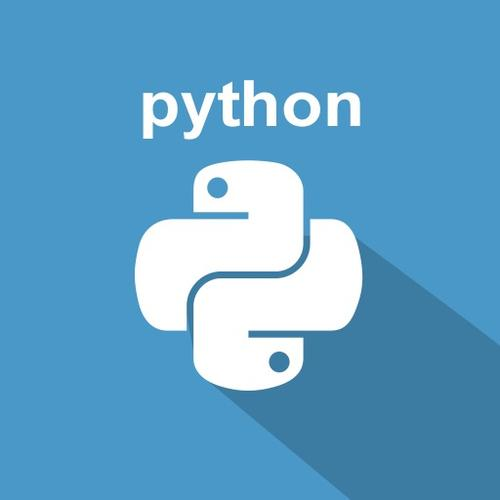

In [66]:
import os
path = os.getcwd() + "\\test.jpg"

#读取图像
img = Image.open(path) #可以读取tif格式图片
img
# img.show()              #显示图像，会调用系统默认的图片查看器

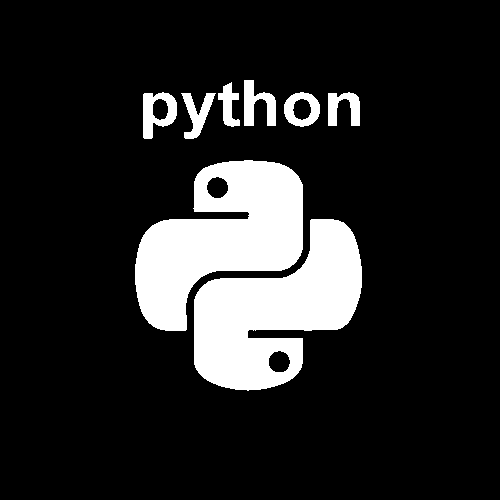

In [67]:
import os
path = os.getcwd() + "\\test.jpg"
image_bina = image_binary(path)
image_bina
# image_bina.show()

## 保存一个图像

In [68]:
def save_image(image, s_file_name, formatting=".png"):
    """
    保存一个图像
    :param image: 图像对象 cv2
    :param s_file_name: 文件名（目标地址+文件名）
    formatting=".png" : 保存的格式，注意有 .
    :return: 无
    """
    if not os.path.exists(os.path.dirname(s_file_name)):
        # 创建结果目录
        os.makedirs(os.path.dirname(s_file_name))

    # 保存图像
    cv2.imencode(formatting, image, [int(cv2.IMWRITE_JPEG_QUALITY), 100])[1].tofile(s_file_name)

In [69]:
import os
path = os.getcwd() + "\\test.jpg"
#读取图像
img = cv2.imread('test.jpg') #可读取tif格式图像 

# 保存到另处
save_image(img, r"D:\test.jpg", formatting=".jpeg")